<a href="https://colab.research.google.com/github/juan-holguin/Senales_Sistemas/blob/main/Ejercicios/Ejercicios_Taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicios teorico-practicos: serie y transformada de fourier

**2.1** Explique las semejanzas y diferencias entre la serie de Fourier (exponencial, trigonometrica y compacta) y la transformada de Fourier, transformada de Fourier en tiempo discreto.

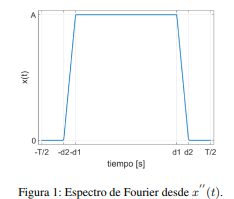


Algunas semejanzas entre la serie y la transformada de fourier son:

- Las dos descomponen una señal en componentes de frecuencia,
- Utilizan funciones ortogonales como senos y cosenos para representar las señales.
- Logran trnasformar una señal en el dominio del tiempo al de frecuencia.
- Las 2 representan funciones como una suma o integral de funciones sinusoidales.

Y algunas diferencias son:

- Las series de fourier se aplican en señales periodicas mientras que la transformada de fourier se aplican en señales no periodicas.
- Las series respresentan señales como una suma discreta de senos y cosenos y para la transformada como una integral continua exponenciales complejos.


**2.4 Aplicacion en circuitos electricos - potencia** Consulte en que consiste la distorsion total de armonicos (Total Harmonic Distortion-(THD)) y el factor de potencia en un circuito electrico. Como puede calcularse el THD desde la FFT?. Como puede calcularse la distorsion del factor de potencia con base al THD?. Genere un ejemplo ilustrativo para el
calculo del THD y la distorsion del factor de potencia para un rectificador de onda completa con carga: i) netamente resistiva y ii) carga RC en serie. Establezca las condiciones necesarias para las simulaciones y pruebe con diferentes valores de R y C. Discuta los resultados obtenidos. Ver cuaderno Rectificador RC y THD.


La Distorsión Armónica Total es una medida que cuantifica la distorsión en una señal eléctrica causada por la presencia de armónicos, que son múltiplos de la frecuencia fundamental. Esta distorsión puede afectar la calidad de la energía eléctrica y el rendimiento de los equipos conectados a la red.

THD para carga resistiva: 24.8994
Factor de potencia para carga resistiva: 1.0000


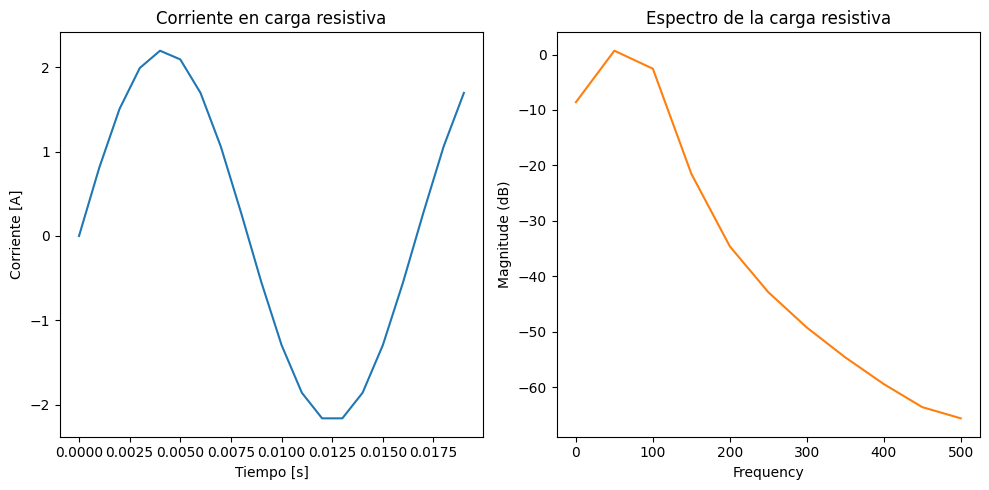

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular el THD
def calculate_thd(signal, fs):
    N = len(signal)
    f = np.fft.fftfreq(N, 1/fs)
    fft_vals = np.fft.fft(signal)

    # Amplitudes de la frecuencia fundamental (primer armónico) y los armónicos
    V1 = np.abs(fft_vals[np.argmax(np.abs(f))])
    harmonics = np.abs(fft_vals[1:])

    # Calcular el THD
    thd = np.sqrt(np.sum(harmonics**2)) / V1
    return thd

# Función para calcular el factor de potencia
def calculate_power_factor(current, voltage):
    # Potencia activa (P) es el promedio de la corriente y el voltaje
    P = np.mean(current * voltage)
    # Potencia aparente (S) es el producto promedio de las magnitudes de corriente y voltaje
    apparent_power = np.mean(np.abs(current) * np.abs(voltage))
    # Factor de potencia (FP)
    power_factor = P / apparent_power
    return power_factor

# Parámetros
fs = 1000  # Frecuencia de muestreo en Hz
T = 0.02  # Duración de la señal en segundos
t = np.linspace(0, T, int(T * fs), endpoint=False)  # Tiempo

# Señal de voltaje de entrada (sin distorsión)
V_in = 220 * np.sin(2 * np.pi * 60 * t)  # Voltaje de onda senoidal

# Corriente en carga resistiva (i = V/R)
R = 100  # Resistencia en ohmios
I_resistive = V_in / R  # Corriente en carga resistiva

# Cálculo de THD
thd_resistive = calculate_thd(I_resistive, fs)

# Cálculo del factor de potencia
pf_resistive = calculate_power_factor(I_resistive, V_in)

# Resultados
print(f"THD para carga resistiva: {thd_resistive:.4f}")
print(f"Factor de potencia para carga resistiva: {pf_resistive:.4f}")

# Graficar la señal de corriente y su espectro
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(t, I_resistive)
plt.title("Corriente en carga resistiva")
plt.xlabel('Tiempo [s]')
plt.ylabel('Corriente [A]')

plt.subplot(1, 2, 2)
plt.magnitude_spectrum(I_resistive, Fs=fs, scale='dB', color='C1')
plt.title("Espectro de la carga resistiva")

plt.tight_layout()
plt.show()


**2.5 Aplicacion en comunicaciones - modulacion AM.** Consulte en que consiste la modulacion por amplitud por deteccion coherente y sus aplicaciones. Genere un ejemplo ilustrativo sobre Python en el que se grafique las señales en el tiempo
y en frecuencia (utilizando la ‘rfft‘) para: senal mensaje tipo pulso rectangular y señal mensaje tipo coseno. El usuario podra definir el indice de modulacion de interes. Ver cuaderno Modulacion AM.

La modulación de amplitud (AM) es una técnica de modulación en la que la amplitud de una señal portadora de alta frecuencia varía en función de una señal de mensaje de baja frecuencia. Esta variación permite transmitir información a través de ondas de radio, siendo común en radiodifusión y comunicaciones de larga distancia.

La detección coherente es un método de demodulación en el que la señal modulada se multiplica nuevamente por la portadora. Este proceso recupera la señal de mensaje original, permitiendo una demodulación precisa y eficiente. Es ampliamente utilizada en comunicaciones por radio, sistemas de radar y comunicaciones ópticas para extraer información como amplitud, fase y frecuencia.

5.714285714285714


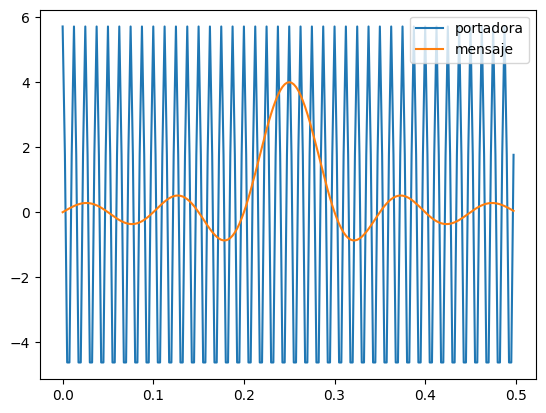

In [41]:
#Frecuencia portadora y muestreo

Fc = 80 #frecuencia de portadora

Fm = 10 #frecuencia del mensaje
Am = 4 #amplitud del mensaje


ti = 0
tf = 5/Fm #cantidad de periodos a graficar de la

Fs = 5*Fc #frecuencia muestreo

t = np.arange(ti,tf,1/Fs) #vector del tiempo
m = Am*np.sinc(2*np.pi*Fm*(t-0.5*tf)/np.pi)#Am*np.cos(2*np.pi*Fm*t) #mensaje #

Im = 0.7 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im

Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*t) #portadora
print(Ac)

plt.plot(t,c,label='portadora')
plt.plot(t,m,label='mensaje')
plt.legend()
plt.show()


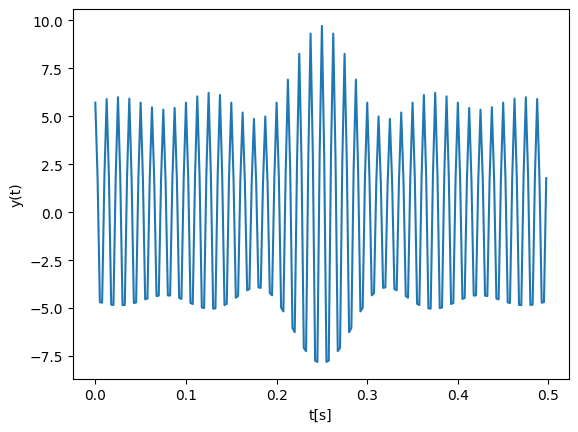

In [42]:
y = (1+m/Ac)*c #señal modulada en AM
plt.plot(t,y)
plt.xlabel('t[s]')
plt.ylabel('y(t)')
plt.show()

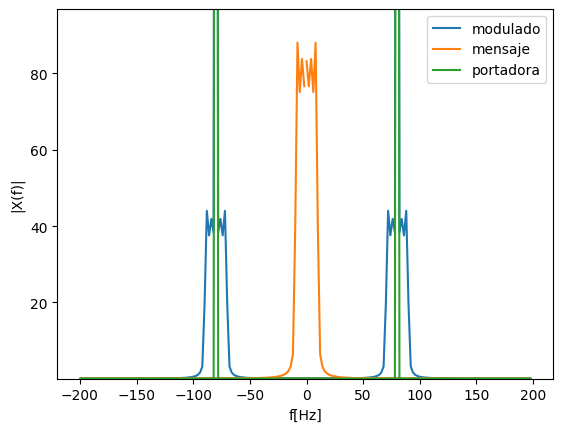

In [43]:
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(m)
Xfy = np.fft.fft(y)

vfre = np.fft.fftfreq(len(c),1/Fs)

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()